### A more indept look at the FWD data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

### Test set
The test set consists of the final 15 games of the 2023-2024 season, about 20% of the dataset 

In [2]:
TEST_SET_GWS = 15 #final 15 GWs of 23-24 season is the test set
NUM_GWS = 38

### FWD data fetch
Creating the dataframe for forwards. This dataframe consists of all data from the last 5 games lagged for every player at every gameweek, as well as oponent-team data, The dataframes have 133 features and 5185 entries, given on the form:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
        width: 0.5
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>total_points</th>
      <th>was_home</th>
      <th>attack_strenght_difference</th>
      <th>strength_difference</th>
      <th>xP_lag1</th>
      <th>xP_lag2</th>
      <th>xP_lag3</th>
      <th>xP_lag4</th>
      <th>xP_lag5</th>
      <th>assists_lag1</th>
      <th>...</th>
      <th>was_home_lag1</th>
      <th>was_home_lag2</th>
      <th>was_home_lag3</th>
      <th>was_home_lag4</th>
      <th>was_home_lag5</th>
      <th>yellow_cards_lag1</th>
      <th>yellow_cards_lag2</th>
      <th>yellow_cards_lag3</th>
      <th>yellow_cards_lag4</th>
      <th>yellow_cards_lag5</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>228</th>
      <td>0</td>
      <td>True</td>
      <td>-50.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>866</th>
      <td>0</td>
      <td>False</td>
      <td>65.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1487</th>
      <td>0</td>
      <td>True</td>
      <td>-80.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>...</td>
      <td>False</td>
      <td>True</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2178</th>
      <td>0</td>
      <td>True</td>
      <td>-285.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2884</th>
      <td>0</td>
      <td>False</td>
      <td>60.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>12626</th>
      <td>2</td>
      <td>False</td>
      <td>-10.0</td>
      <td>-1.0</td>
      <td>3.3</td>
      <td>3.3</td>
      <td>3.7</td>
      <td>4.2</td>
      <td>1.5</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>13365</th>
      <td>2</td>
      <td>True</td>
      <td>-340.0</td>
      <td>-2.0</td>
      <td>3.0</td>
      <td>3.3</td>
      <td>3.3</td>
      <td>3.7</td>
      <td>4.2</td>
      <td>0.0</td>
      <td>...</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>14138</th>
      <td>7</td>
      <td>False</td>
      <td>-130.0</td>
      <td>-2.0</td>
      <td>2.5</td>
      <td>3.0</td>
      <td>3.3</td>
      <td>3.3</td>
      <td>3.7</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>14919</th>
      <td>9</td>
      <td>True</td>
      <td>-70.0</td>
      <td>0.0</td>
      <td>2.3</td>
      <td>2.5</td>
      <td>3.0</td>
      <td>3.3</td>
      <td>3.3</td>
      <td>0.0</td>
      <td>...</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>15712</th>
      <td>1</td>
      <td>False</td>
      <td>-310.0</td>
      <td>-3.0</td>
      <td>6.5</td>
      <td>2.3</td>
      <td>2.5</td>
      <td>3.0</td>
      <td>3.3</td>
      <td>0.0</td>
      <td>...</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
<p>5185 rows × 134 columns</p>
</div>   

In [3]:
def get_FWD_player_data() -> pd.DataFrame:
    """
    Get the data of all the FW players
    :return: data of all the FW players
    """
    FWD_cols = [
                'name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 
                'creativity', 'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 
                'yellow_cards', 'GW'
                ]
    
    # Getting data from 22/23 season    
    df_22_23 = pd.read_csv("../data/2022-23/gws/merged_gw.csv", usecols=FWD_cols)
    df_22_23['season'] = '2022-23'

    # Getting data from 23/24 season
    df_23_24 = pd.read_csv("../data/2023-24/gws/merged_gw.csv", usecols=FWD_cols)
    #excluding the test set
    df_23_24.drop(df_23_24[df_23_24['GW'] >= NUM_GWS-TEST_SET_GWS].index, inplace=True)
    df_23_24['season'] = '2023-24'
    
    # Merging the data
    df = pd.concat([df_22_23, df_23_24])

    # Filtering only the FWD players
    df = df[df['position'] == "FWD"]

    # Adding information about the opponent team, looking at strength differences
    team_info_cols = [
                     'id', 'name', 'strength', 'strength_attack_home', 'strength_attack_away', 
                     'strength_defence_home', 'strength_defence_away'
                     ]
    
    for index, row in df.iterrows():
        team_info_df = pd.read_csv(f"../data/{row['season']}/teams.csv", usecols=team_info_cols)
        if row['was_home']:
            df.at[index, 'attack_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_attack_home'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_defence_away'].values[0]
            df.at[index, 'defence_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_defence_home'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_attack_away'].values[0]

        else:
            df.at[index, 'attack_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_attack_away'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_defence_home'].values[0]
            df.at[index, 'defence_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_defence_away'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_attack_home'].values[0]

        df.at[index, 'strength_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength'].values[0]

    # Adding lagged features
    NUM_LAGS = 5
    lagged_features = [
                'xP', 'assists', 'bonus', 'bps', 'creativity', 
                'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 
                'minutes', 'own_goals', 'penalties_missed', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'total_points', 'transfers_balance', 'transfers_in', 
                'transfers_out', 'value', 
    ]

    df.sort_values(by=['name', 'season', 'GW'], ascending=[True, True, True], inplace=True)
    
    #Removing red cards from the data, red cards are very rare for FWD players, so we can treat them like outliers

    lagged_columns = {}
    for feature in lagged_features:
        for i in range(1, NUM_LAGS + 1):
            # Create a new column with lagged values
            lagged_columns[f'{feature}_lag{i}'] = df.groupby('name')[feature].shift(i)

    # Combine the original DataFrame with the new lagged features at once
    lagged_df = pd.DataFrame(lagged_columns)
    df = pd.concat([df, lagged_df], axis=1)

    # Removing coloumns with info about the future
    coloumns_to_remove = [
                'name', 'creativity', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 
                'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 
                'yellow_cards', 'season', 'was_home'
                ]
    
    df.drop(coloumns_to_remove, axis=1, inplace=True)

    return df



In [20]:
def get_FWD_test_set() -> pd.DataFrame:
    """
    Get the test set of the FW players
    :return: test set of the FW players
    """
    FWD_cols = [
                'name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 
                'creativity', 'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 
                'yellow_cards', 'GW'
                ]
    

    # Getting data from 23/24 season
    df = pd.read_csv("../data/2023-24/gws/merged_gw.csv", usecols=FWD_cols)
    #excluding the test set
    df.drop(df[df['GW'] < NUM_GWS-TEST_SET_GWS].index, inplace=True)
    
    # Merging the data
    # Filtering only the FWD players
    df = df[df['position'] == "FWD"]

    # Adding information about the opponent team, looking at strength differences
    team_info_cols = [
                     'id', 'name', 'strength', 'strength_attack_home', 'strength_attack_away', 
                     'strength_defence_home', 'strength_defence_away'
                     ]
    
    
    team_info_df = pd.read_csv(f"../data/2023-24/teams.csv", usecols=team_info_cols)
    for index, row in df.iterrows():
        if row['was_home']:
            df.at[index, 'attack_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_attack_home'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_defence_away'].values[0]
            df.at[index, 'defence_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_defence_home'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_attack_away'].values[0]
        else:
            df.at[index, 'attack_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_attack_away'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_defence_home'].values[0]
            df.at[index, 'defence_strenght_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength_defence_away'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength_attack_home'].values[0]
        df.at[index, 'strength_difference'] = team_info_df.loc[team_info_df['name'] == row['team'], 'strength'].values[0] - team_info_df.loc[team_info_df['id'] == row['opponent_team'], 'strength'].values[0]

    # Adding lagged features
    NUM_LAGS = 5
    lagged_features = [
                'xP', 'assists', 'bonus', 'bps', 'creativity', 
                'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 
                'minutes', 'own_goals', 'penalties_missed', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'total_points', 'transfers_balance', 'transfers_in', 
                'transfers_out', 'value', 
    ]

    df.sort_values(by=['name', 'GW'], ascending=[True, True], inplace=True)
    
    #Removing red cards from the data, red cards are very rare for FWD players, so we can treat them like outliers

    lagged_columns = {}
    for feature in lagged_features:
        for i in range(1, NUM_LAGS + 1):
            # Create a new column with lagged values
            lagged_columns[f'{feature}_lag{i}'] = df.groupby('name')[feature].shift(i)

    # Combine the original DataFrame with the new lagged features at once
    lagged_df = pd.DataFrame(lagged_columns)
    df = pd.concat([df, lagged_df], axis=1)

    # Removing coloumns with info about the future
    coloumns_to_remove = [
                'name', 'creativity', 'position', 'team', 'xP', 'assists', 'bonus', 'bps', 
                'expected_assists', 'expected_goal_involvements', 
                'expected_goals', 'goals_scored', 'ict_index', 'influence', 'minutes', 
                'opponent_team', 'own_goals', 'penalties_missed', 'red_cards', 
                'selected', 'team_a_score', 'team_h_score', 'threat', 
                'transfers_balance', 'transfers_in', 'transfers_out', 'value', 
                'yellow_cards', 'was_home'
                ]
    
    df.drop(coloumns_to_remove, axis=1, inplace=True)

    return df

## Exploring data, Y

In [5]:
fwd_player_data = get_FWD_player_data()

### Looking at distributions of points 
Note that injuries and red cards are not removed from the datasett

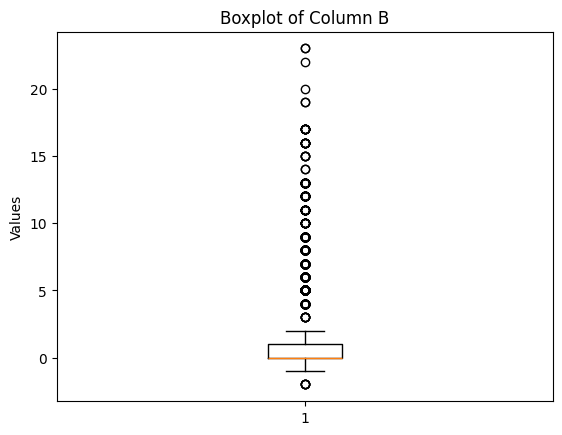

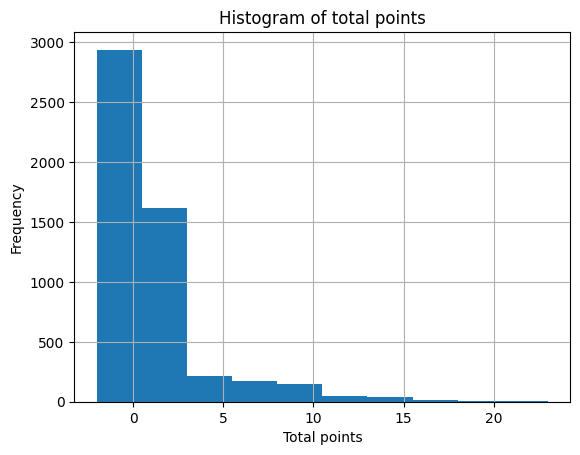

In [6]:
total_points= fwd_player_data['total_points']
plt.boxplot(total_points)
plt.title('Boxplot of Column B')
plt.ylabel('Values')
plt.show()

#plotting distribution of total points
total_points.hist()
plt.title('Histogram of total points')
plt.xlabel('Total points')
plt.ylabel('Frequency')
plt.show()


## Skewnes
The data is left-skewed, thus making it difficult to predict what players get high scores, which is of interest in a fantasy premier league point predicter. This is the reason why we use tree based models, as they are not effected

#### Looking at possibility to make a classification model for removing players who get zero points, benchwarmers

In [7]:
Y = fwd_player_data['total_points']
X = fwd_player_data.drop('total_points', axis=1)

print(X.shape, Y.shape)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


(5185, 119) (5185,)


## Testing weather the large amout of 0 point players effect the prediction of high scoring players
Using k-fold cross model validation

### Including bench warmers in the model training

In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error


y = fwd_player_data['total_points']
X = fwd_player_data.drop('total_points', axis=1)

print(fwd_player_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

reg_with_all_data = RandomForestRegressor(n_estimators=50, random_state=0, oob_score=True)
reg_with_all_data.fit(X_train, y_train)

mse_scorer = make_scorer(mean_squared_error)

k_folds = KFold(n_splits = 5)

cv_scores = cross_val_score(reg_with_all_data, X_train, y_train, cv=k_folds, scoring=mse_scorer)

print("Cross-Validation MSE Scores with bench warmers: ", cv_scores)
print("Average CV MSE Score with bench warmers: ", cv_scores.mean())

# Evaluating the model
predictions = reg_with_all_data.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

(5185, 120)
Cross-Validation MSE Scores with bench warmers:  [5.50164915 4.1003981  5.61022203 5.92428518 5.41918484]
Average CV MSE Score with bench warmers:  5.3111478623539
Mean Squared Error: 6.244103833461543


### Not Including bench warmers

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error


# removing players who have not played the last 3 matches (bench warmers)
fwd_player_data_filtered = fwd_player_data.loc[    
    (fwd_player_data['total_points'] != 0) &
    (fwd_player_data['minutes_lag1'] > 0)  &
    (fwd_player_data['minutes_lag2'] > 0)]

print(fwd_player_data_filtered.shape)

y = fwd_player_data_filtered['total_points']
X = fwd_player_data_filtered.drop('total_points', axis=1)

# Splitting the data into training and testing sets, using the same split on both sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_filtered = RandomForestRegressor(n_estimators=50, random_state=0, oob_score=True)
reg_filtered.fit(X_train, y_train)

mse_scorer = make_scorer(mean_squared_error)

k_folds = KFold(n_splits = 5)

cv_scores = cross_val_score(reg_filtered, X_train, y_train, cv=k_folds, scoring=mse_scorer)

print("Cross-Validation MSE Scores with bench warmers: ", cv_scores)
print("Average CV MSE Score with bench warmers: ", cv_scores.mean())

# Evaluating the model
predictions = reg_filtered.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



(1555, 120)
Cross-Validation MSE Scores with bench warmers:  [11.79158715 11.5567759  11.22713414 11.18027149 11.22680806]
Average CV MSE Score with bench warmers:  11.396515347842985
Mean Squared Error: 11.676091318327975


Removing benchwarmers gives a much higher mse, this is probably because it is "easy" to predict low scoring players. Testing on only high scoring players. Using the original test_set since we are not tuning now

Mean Squared Error from the filtered model: 11.472881063122923
Mean Squared Error from the model with all data: 11.990728837024733


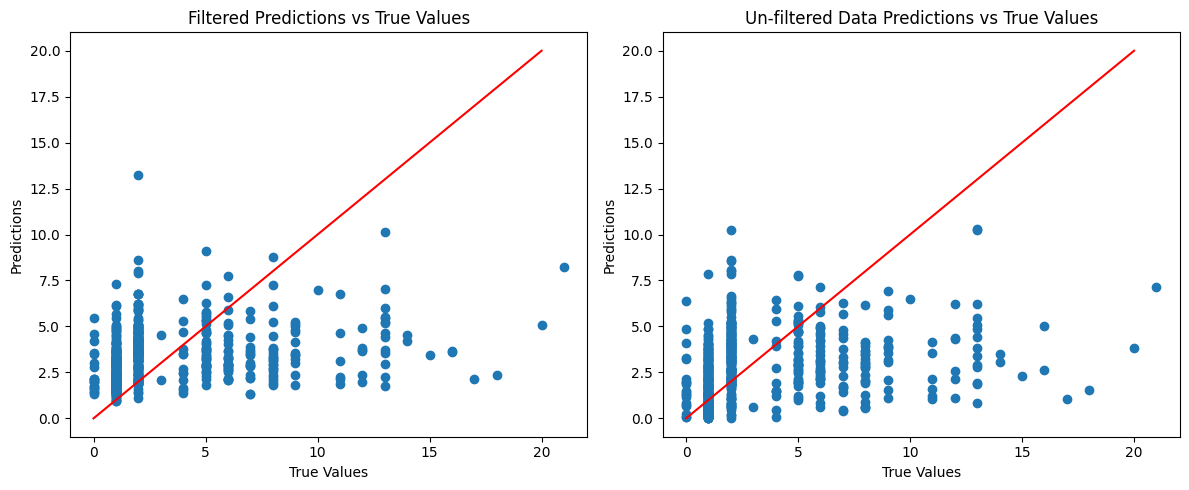

number of low predictions in the filtered model:  0


In [10]:
test_set = get_FWD_test_set()

#removing players who dont get points because they don't play
test_set = test_set.loc[test_set['minutes'] > 0]
test_set.drop('minutes', axis=1, inplace=True)

y = test_set['total_points']
X = test_set.drop('total_points', axis=1)

predictions_filtered = reg_filtered.predict(X)
mse = mean_squared_error(y, predictions_filtered)
print(f'Mean Squared Error from the filtered model: {mse}')

predictions_all_data = reg_with_all_data.predict(X)
mse = mean_squared_error(y, predictions_all_data)
print(f'Mean Squared Error from the model with all data: {mse}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) 
plt.scatter(y, predictions_filtered)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0, 20], [0, 20], color='red')
plt.title('Filtered Predictions vs True Values')

plt.subplot(1, 2, 2)
plt.scatter(y, predictions_all_data)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0, 20], [0, 20], color='red')
plt.title('Un-filtered Data Predictions vs True Values')

# Display the plots
plt.tight_layout()
plt.show()

print("number of low predictions in the filtered model: ", len(predictions_filtered[predictions_filtered < 0.5]))


## Conclution

I should try to first make a conservative predictions of what players are not playing, then I should make the model based on the playing players. However, if the difference is an offsett-error, as it allso might seem, then it is not worth the hassle to make the classifyer

## Tuning hyper parameters using cross validation

https://scikit-learn.org/stable/modules/cross_validation.html


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

data = get_FWD_player_data()
y = data['total_points']
X = data.drop('total_points', axis=1)

param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
}


# Instantiate the model
reg = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)

print(results)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best R^2 score: ", grid_search.best_score_)


c:\Users\trygt\miniconda3\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         3.833171      0.177309         0.010458        0.001608   
1         7.424238      0.177982         0.012525        0.003709   
2        15.513130      0.670015         0.025630        0.002496   
3        40.602819      2.351537         0.053738        0.005964   
4        80.592108      1.236704         0.110067        0.011033   
..             ...           ...              ...             ...   
175       2.841935      0.032152         0.008949        0.001763   
176       5.716343      0.073871         0.013845        0.002733   
177      11.280081      0.111869         0.024385        0.003783   
178      28.499853      0.235658         0.048324        0.002969   
179      45.754606      0.582062         0.056854        0.003586   

    param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0              None                       1                        2   
1              None        

Best model-parameters found to be: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}

## Creating and saving the FWD model

In [13]:
import joblib

data = get_FWD_player_data()
y = data['total_points']
X = data.drop('total_points', axis=1)

final_model = RandomForestRegressor(max_depth = 10, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 500)
final_model.fit(X, y)

joblib.dump(final_model, 'FWD_regression_model.pkl')


## Load the saved model
#loaded_model = joblib.load('final_random_forest_model.pkl')

## Use the loaded model for predictions
#predictions = loaded_model.predict(X_test)

['FWD_regression_model.pkl']

## Testing model


Mean Squared Error from the model: 4.286868161581387


Text(0.5, 1.0, 'Filtered Predictions vs True Values')

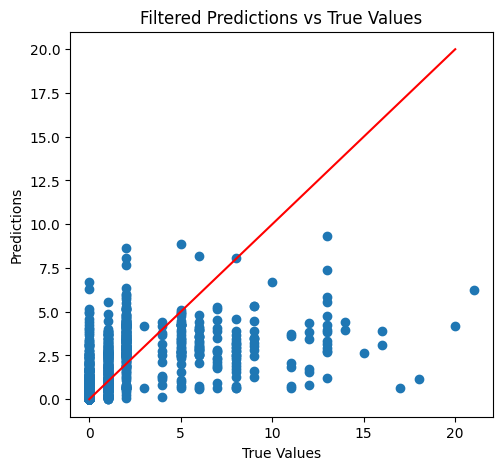

In [21]:
test_set = get_FWD_test_set()
y = test_set['total_points']
X = test_set.drop('total_points', axis=1)

model = joblib.load('FWD_regression_model.pkl')


predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error from the model: {mse}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) 
plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([0, 20], [0, 20], color='red')
plt.title('Filtered Predictions vs True Values')



## Final score:

MSE: 4.286868161581387